### Import Required Libraries and Modules



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.utils import shuffle
import glob
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras import Sequential ,layers ,applications
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

### Read the files

In [2]:
aphids=glob.glob('Aphids edited/*jpg')
armyworm=glob.glob('Army worm edited//*jpg')
bacterial=glob.glob('Bacterial Blight edited//*jpg')
healtyleaf=glob.glob('Healthy leaf edited//*jpg')
powdery=glob.glob('Powdery Mildew Edited//*jpg')
target=glob.glob('Target spot edited//*jpg')

### Define Classes and Corresponding Labels

In [3]:
classes={0:'aphids',1:'armyworm',2:'bacterial',3:'healtyleaf',4:'powdery',5:'target'}

### Load and Label Images for Each Flower Category

In [4]:
images=[]
labels=[]
for i in aphids:
    img=plt.imread(i)
    images.append(img)
    labels.append(0)
    
for i in armyworm:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)
    
for i in bacterial:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)
    
for i in healtyleaf:
    img=plt.imread(i)
    images.append(img)
    labels.append(3)
    
for i in powdery:
    img=plt.imread(i)
    images.append(img)
    labels.append(4)
    
for i in target:
    img=plt.imread(i)
    images.append(img)
    labels.append(5)

### Plot first few images

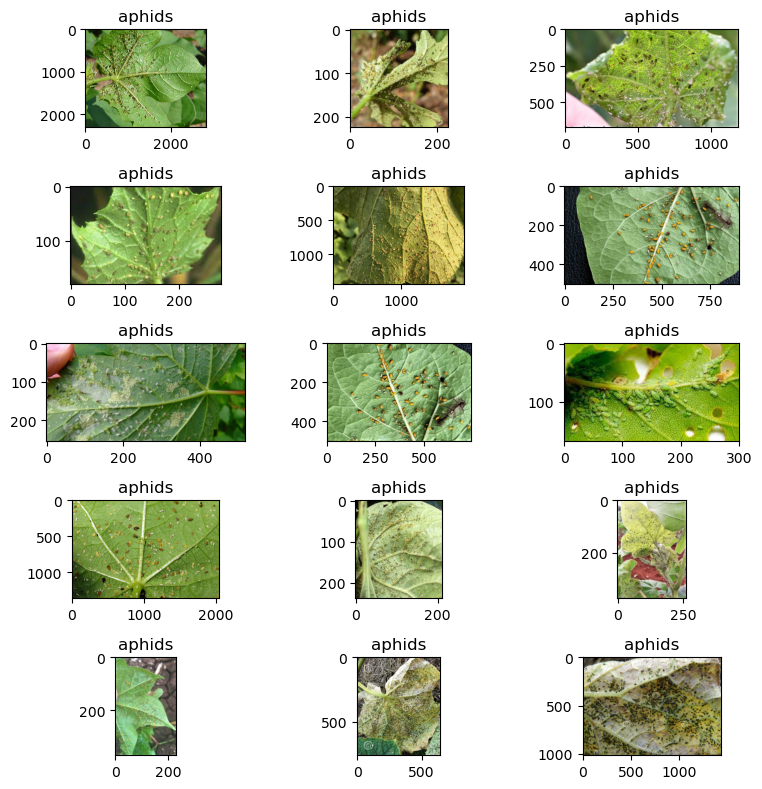

In [5]:
plt.figure(figsize=(8,8))
for i in  range(15):
    plt.subplot(5,3,i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
plt.tight_layout()
    

## shuffle the images

In [6]:
images,labels=shuffle(images,labels)

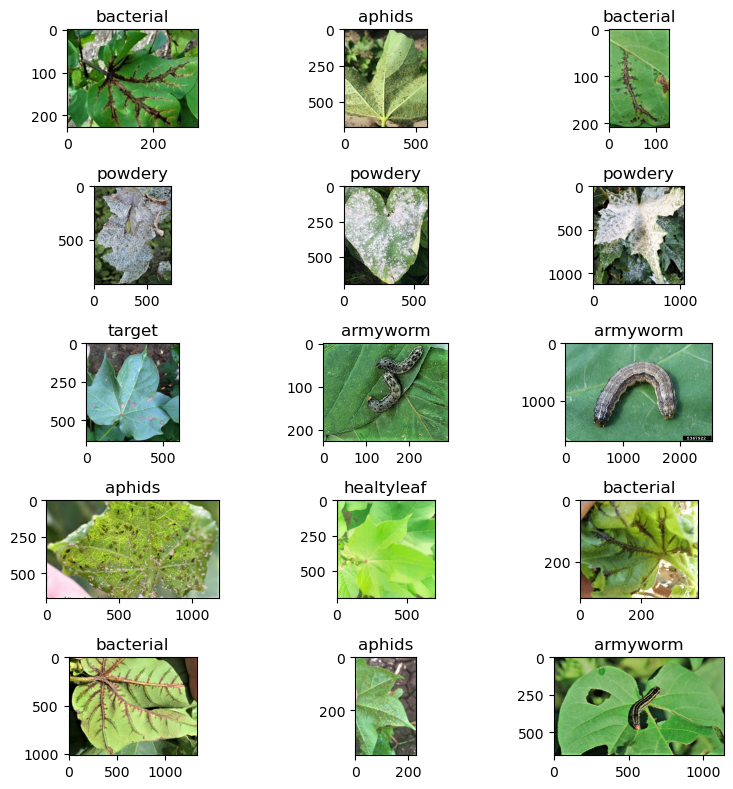

In [7]:
plt.figure(figsize=(8,8))
for i in  range(15):
    plt.subplot(5,3,i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
plt.tight_layout()

## Resize the images  to  EfficientNetV2

In [8]:
X=[]
for i in images:
    X.append(resize(i,(224,224,3)))

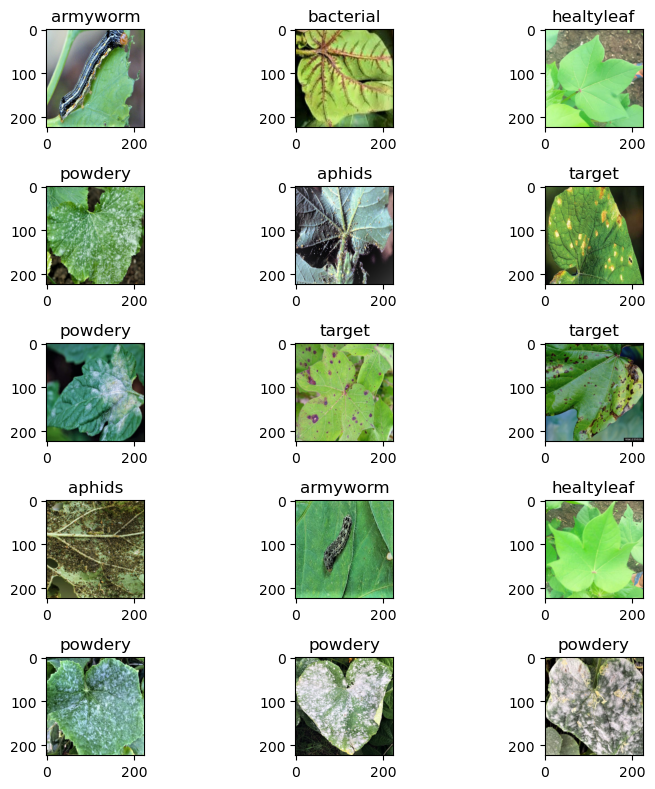

In [21]:
plt.figure(figsize=(8,8))
for i in  range(15):
    plt.subplot(5,3,i+1)
    plt.imshow(X[i])
    plt.title(classes[labels[i]])
plt.tight_layout()

In [9]:
X=np.array(X)
y=np.array(labels)



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y , train_size=0.25 , random_state=100)

In [14]:
extraction_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

## Load the pretrained model

In [12]:
hub.load(extraction_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x277f233bfd0>

In [13]:
no_of_class=6

### Instantiate MobileNetV2 without Top Layer as Feature Extractor

In [18]:
pretrained_model=hub.KerasLayer(extraction_model,input_shape=(224,224,3),trainable=False)

## Building a model

In [24]:
model=Sequential([
    pretrained_model,
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64,activation='relu'),
    layers.Dense(no_of_class,activation='softmax')
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_4 (Dense)             (None, 64)                81984     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 6)                 390       
                                                                 
Total params: 2344518 (8.94 MB)
Trainable params: 86534 (338.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [26]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

## Train the model

In [27]:
model.fit(X_train,y_train ,epochs=10,validation_split=0.05)

Epoch 1/10
2/2 [==============================] - 3s 1s/step - loss: 1.8611 - accuracy: 0.1818 - val_loss: 1.3818 - val_accuracy: 0.3333
Epoch 2/10
2/2 [==============================] - 1s 627ms/step - loss: 1.4914 - accuracy: 0.4727 - val_loss: 1.2358 - val_accuracy: 0.3333
Epoch 3/10
2/2 [==============================] - 2s 729ms/step - loss: 1.2219 - accuracy: 0.6182 - val_loss: 1.0027 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 562ms/step - loss: 0.9526 - accuracy: 0.8000 - val_loss: 0.7879 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 710ms/step - loss: 0.7953 - accuracy: 0.8364 - val_loss: 0.6347 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 1s 580ms/step - loss: 0.6582 - accuracy: 0.8909 - val_loss: 0.5302 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 1s 706ms/step - loss: 0.5695 - accuracy: 0.8909 - val_loss: 0.4312 - val_accuracy: 1.0000
Epoch 8/10
2/2 [=======

In [28]:
pred=model.predict(X_test)

6/6 [==============================] - 5s 665ms/step


In [30]:
y_pred=[np.argmax(i) for i in pred]

## Calculate acuuracy score and print classification report

In [35]:
print(f'accuracy score is: {accuracy_score(y_test,y_pred)}')
print('classification report is :')
print(classification_report(y_test,y_pred))

accuracy score is: 0.6818181818181818
classification report is :
              precision    recall  f1-score   support

           0       0.45      0.56      0.50        27
           1       1.00      0.83      0.91        30
           2       0.44      0.79      0.57        29
           3       0.93      0.90      0.91        29
           4       0.95      0.63      0.76        30
           5       0.67      0.39      0.49        31

    accuracy                           0.68       176
   macro avg       0.74      0.68      0.69       176
weighted avg       0.75      0.68      0.69       176



<Axes: >

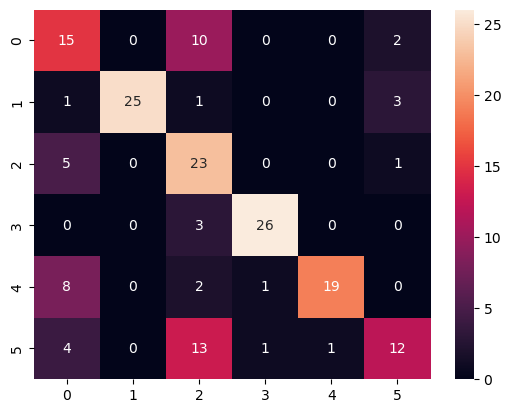

In [36]:
sns.heatmap(confusion_matrix(y_test,y_pred) , annot = True , fmt='d')

### Email:shamilmskeeri@gmail.com